### **VGG-16 on Cats_and_Dogs_Dataset**

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-08-19 09:05:27--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  91.1MB/s    in 0.7s    

2022-08-19 09:05:28 (91.1 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [33]:
import numpy as np

In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [6]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [7]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [8]:
import tensorflow as tf
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [9]:
history = model.fit(train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 32s 171ms/step - loss: 0.5007 - acc: 0.7585 - val_loss: 0.3511 - val_acc: 0.8760
Epoch 2/10
100/100 [==============================] - 19s 187ms/step - loss: 0.2862 - acc: 0.9035 - val_loss: 0.2826 - val_acc: 0.8940
Epoch 3/10
100/100 [==============================] - 20s 198ms/step - loss: 0.2233 - acc: 0.9310 - val_loss: 0.2595 - val_acc: 0.9050
Epoch 4/10
100/100 [==============================] - 18s 179ms/step - loss: 0.1896 - acc: 0.9450 - val_loss: 0.2608 - val_acc: 0.8960
Epoch 5/10
100/100 [==============================] - 18s 180ms/step - loss: 0.1597 - acc: 0.9560 - val_loss: 0.2304 - val_acc: 0.9100
Epoch 6/10
100/100 [==============================] - 19s 185ms/step - loss: 0.1416 - acc: 0.9630 - val_loss: 0.2330 - val_acc: 0.8970
Epoch 7/10
100/100 [==============================] - 18s 182ms/step - loss: 0.1247 - acc: 0.9690 - val_loss: 0.2177 - val_acc: 0.9150
Epoch 8/10
100/100 [==============================] - 1

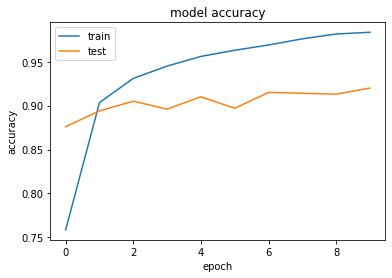

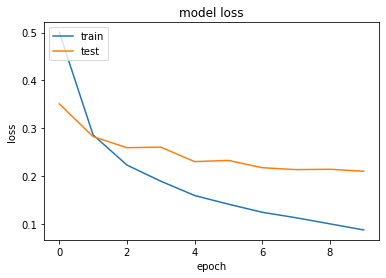

In [10]:
import matplotlib.pyplot as plt
#Plotting model Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Plotting model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
print('Accuracy Score = ',np.max(history.history['val_acc']))

Accuracy Score =  0.9200000166893005


### **GoogleNet on Cats_and_dogs Dataset**

In [11]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model2 = InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model2.trainable = False #freeze the layers
base_model2.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)           

In [12]:
model2 = tf.keras.Sequential([
    base_model2,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model2.summary()

model2.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_1 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [13]:
history2 = model2.fit(train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 18s 138ms/step - loss: 0.1647 - acc: 0.9440 - val_loss: 0.0516 - val_acc: 0.9810
Epoch 2/10
100/100 [==============================] - 11s 114ms/step - loss: 0.0140 - acc: 0.9970 - val_loss: 0.0491 - val_acc: 0.9800
Epoch 3/10
100/100 [==============================] - 11s 115ms/step - loss: 0.0044 - acc: 0.9995 - val_loss: 0.0495 - val_acc: 0.9830
Epoch 4/10
100/100 [==============================] - 11s 114ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0499 - val_acc: 0.9830
Epoch 5/10
100/100 [==============================] - 11s 113ms/step - loss: 9.9275e-04 - acc: 1.0000 - val_loss: 0.0478 - val_acc: 0.9830
Epoch 6/10
100/100 [==============================] - 11s 114ms/step - loss: 7.9155e-04 - acc: 1.0000 - val_loss: 0.0482 - val_acc: 0.9830
Epoch 7/10
100/100 [==============================] - 11s 114ms/step - loss: 6.5641e-04 - acc: 1.0000 - val_loss: 0.0474 - val_acc: 0.9830
Epoch 8/10
100/100 [=======================

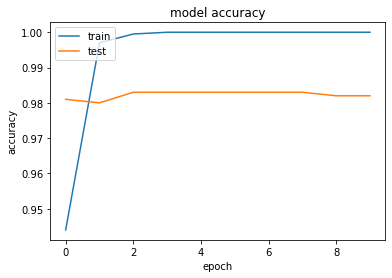

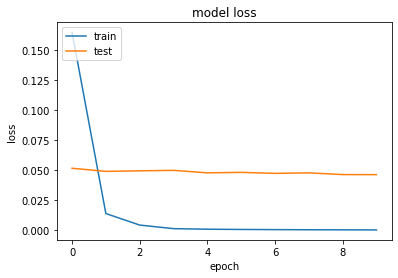

In [14]:
import matplotlib.pyplot as plt
#Plotting Accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Plotting Loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
print('Accuracy Score = ',np.max(history2.history['val_acc']))

Accuracy Score =  0.9829999804496765


### **ResNet50 on Cats_and_Dogs Dataset**

In [18]:
from tensorflow.keras.applications.resnet50 import ResNet50
base_model3 = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model3.trainable = False #freeze the layers
base_model3.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [19]:
model3 = tf.keras.Sequential([
    base_model3,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model3.summary()

model3.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_3 (Dense)             (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


In [20]:
history3 = model3.fit(train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 17s 139ms/step - loss: 0.7530 - acc: 0.5555 - val_loss: 0.7173 - val_acc: 0.5540
Epoch 2/10
100/100 [==============================] - 13s 125ms/step - loss: 0.6497 - acc: 0.6290 - val_loss: 0.6289 - val_acc: 0.6650
Epoch 3/10
100/100 [==============================] - 12s 125ms/step - loss: 0.6588 - acc: 0.6280 - val_loss: 0.6205 - val_acc: 0.6710
Epoch 4/10
100/100 [==============================] - 12s 124ms/step - loss: 0.6122 - acc: 0.6610 - val_loss: 0.6916 - val_acc: 0.5980
Epoch 5/10
100/100 [==============================] - 12s 123ms/step - loss: 0.5997 - acc: 0.6685 - val_loss: 0.6125 - val_acc: 0.6810
Epoch 6/10
100/100 [==============================] - 12s 123ms/step - loss: 0.5815 - acc: 0.6925 - val_loss: 0.6042 - val_acc: 0.6780
Epoch 7/10
100/100 [==============================] - 12s 122ms/step - loss: 0.5858 - acc: 0.6760 - val_loss: 0.6268 - val_acc: 0.6590
Epoch 8/10
100/100 [==============================] - 1

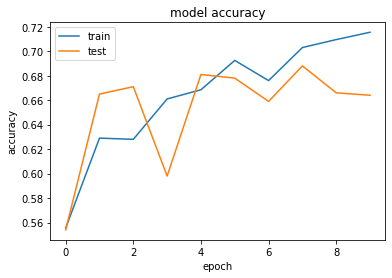

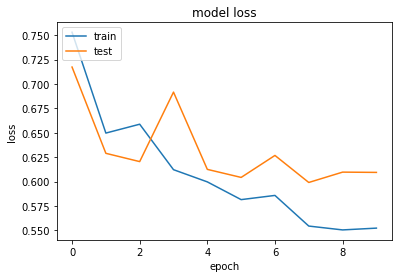

In [21]:
import matplotlib.pyplot as plt
#Plotting Accuracy
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Plotting Loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
print('Accuracy Score = ',np.max(history3.history['val_acc']))

Accuracy Score =  0.6880000233650208


### **Efficient Net B0 on Cats_And_Dogs Dataset**

In [22]:
from tensorflow.keras.applications import EfficientNetB0
base_model4 = EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model4.trainable = False #freeze the layers
base_model4.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_5[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (Zero

In [23]:
model4 = tf.keras.Sequential([
    base_model4,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model4.summary()

model4.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dense_4 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 4,175,013
Trainable params: 125,442
Non-trainable params: 4,049,571
_________________________________________________________________


In [24]:
history4 = model4.fit(train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 18s 124ms/step - loss: 0.7687 - acc: 0.5235 - val_loss: 0.8967 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 11s 110ms/step - loss: 0.7386 - acc: 0.4750 - val_loss: 0.8432 - val_acc: 0.5000
Epoch 3/10
100/100 [==============================] - 11s 110ms/step - loss: 0.7858 - acc: 0.5175 - val_loss: 0.6936 - val_acc: 0.5000
Epoch 4/10
100/100 [==============================] - 11s 111ms/step - loss: 0.7432 - acc: 0.4995 - val_loss: 0.7072 - val_acc: 0.5000
Epoch 5/10
100/100 [==============================] - 11s 111ms/step - loss: 0.7317 - acc: 0.5130 - val_loss: 0.8309 - val_acc: 0.5000
Epoch 6/10
100/100 [==============================] - 11s 110ms/step - loss: 0.7500 - acc: 0.5110 - val_loss: 0.7207 - val_acc: 0.5000
Epoch 7/10
100/100 [==============================] - 11s 110ms/step - loss: 0.7725 - acc: 0.4870 - val_loss: 0.7110 - val_acc: 0.5000
Epoch 8/10
100/100 [==============================] - 1

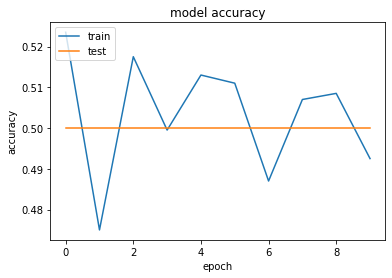

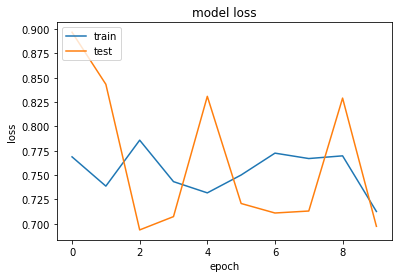

In [25]:
#Plotting Accuracy
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Plotting Loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
print('Accuracy Score = ',np.max(history4.history['val_acc']))

Accuracy Score =  0.5


### **MobileNetV2 on Cats_and_Dogs Dataset**

In [26]:
from tensorflow.keras.applications import MobileNetV2
base_model5 = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model5.trainable = False #freeze the layers
base_model5.summary()

9420800/9406464 [==============================] - 1s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [27]:
model5 = tf.keras.Sequential([
    base_model5,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model5.summary()

model5.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_5 (Flatten)         (None, 62720)             0         
                                                                 
 dense_5 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


In [28]:
history5 = model5.fit(train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 14s 112ms/step - loss: 0.1334 - acc: 0.9535 - val_loss: 0.0871 - val_acc: 0.9720
Epoch 2/10
100/100 [==============================] - 10s 104ms/step - loss: 0.0089 - acc: 0.9965 - val_loss: 0.0989 - val_acc: 0.9740
Epoch 3/10
100/100 [==============================] - 10s 104ms/step - loss: 0.0026 - acc: 0.9995 - val_loss: 0.1035 - val_acc: 0.9720
Epoch 4/10
100/100 [==============================] - 11s 107ms/step - loss: 7.1459e-04 - acc: 1.0000 - val_loss: 0.1015 - val_acc: 0.9720
Epoch 5/10
100/100 [==============================] - 10s 104ms/step - loss: 5.0116e-04 - acc: 1.0000 - val_loss: 0.1015 - val_acc: 0.9710
Epoch 6/10
100/100 [==============================] - 10s 103ms/step - loss: 3.8833e-04 - acc: 1.0000 - val_loss: 0.1016 - val_acc: 0.9720
Epoch 7/10
100/100 [==============================] - 10s 104ms/step - loss: 3.1784e-04 - acc: 1.0000 - val_loss: 0.1013 - val_acc: 0.9720
Epoch 8/10
100/100 [===================

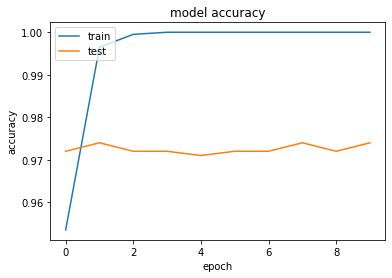

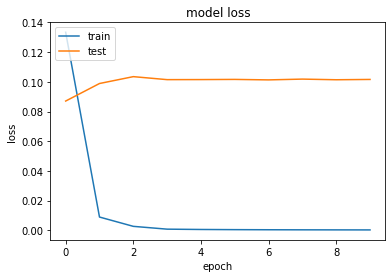

In [29]:
#Plotting Accuracy
plt.plot(history5.history['acc'])
plt.plot(history5.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Plotting Loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
print('Accuracy Score = ',np.max(history5.history['val_acc']))

Accuracy Score =  0.9739999771118164
